# Exercise 4.10 Coding Etiquette & Excel Reporting

This Script follows the following structure.

    1.Importing libraries
    1.2 creating path and importing Dataframe
    2.PII security Implications
    3.Regional Flag
    4.Exlusion Flag for Customer Activity
    5.Marketing Strategies / Customer Profiling
    6.Create an appropriate visualization to show the distribution of profiles and answering Key Questions of Project Brief

# 1. Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1.2 Creating path and import Dataframe

In [2]:
# Creating path

In [3]:
path = r'C:\Users\stefa\15-02-2022 Instacart Basket Analysis'

In [4]:
# Importing final Dataframe from Exercise 4.9

In [5]:
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

# 2. PII security Implications

In [6]:
# check Dataframe for PII relevant Columns

In [7]:
pd.set_option('display.max_columns', None)    # Code for making all columns visible

In [8]:
ords_prods_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,First_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [9]:
# surname visible, regarding PII this will be removed as it contains personal Data

In [10]:
ords_prods_customers = ords_prods_customers.drop('surname', 1)

C:\Users\stefa\AppData\Local\Temp/ipykernel_3268/4125211231.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ords_prods_customers = ords_prods_customers.drop('surname', 1)


In [11]:
# verification for successful removal

In [12]:
ords_prods_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,First_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


#  3. Regional Flag

In [13]:
# State Verification

states = ords_prods_customers['state'].unique()
print(states)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [14]:
# Compared States listed here with https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States  and no inconsistencies have been identified

In [15]:
# Creating Regional Lists

Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','New Jersey','Pennsylvania']
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [16]:
# Create Regional Column

cond=[ords_prods_customers['state'].isin(Northeast),ords_prods_customers['state'].isin(Midwest),ords_prods_customers['state'].isin(South),ords_prods_customers['state'].isin(West)]
values=['Northeast','Midwest','South','West']
ords_prods_customers['region']=np.select(cond,values)

In [17]:
# Dataframe Verification

pd.set_option('display.max_columns', None)
ords_prods_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,First_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,True,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,True,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,True,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,True,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [18]:
# Spending Habits between US Regions creating crosstab

crosstab = pd.crosstab(ords_prods_customers['region'], ords_prods_customers['spending_flag'], dropna = False)

In [19]:
# Saving generated Crosstab to clipboard for later usage

crosstab.to_clipboard()

#crosstab with Spending habits between Regions

region	    High Spender	Low Spender
Midwest	    157347	        7495188
Northeast	109159	        5655673
South	    211695	        10659024
West	    161834	        8191348


In [20]:
# Calculation of percentage between High and Low Spender

Midwest = (157347/7495188)*100
Northeast = (109159/5655673)*100
South = (211695/10659024)*100
West = (161834/8191348)*100

In [21]:
# Result of Spending Habits in the Midwest

Midwest

2.099306915316867

In [22]:
# Result of Spending Habits in the Northeast

Northeast

1.9300797623907888

In [23]:
# Result of Spending Habits in the South

South

1.9860636395977718

In [24]:
# Result of Spending Habit in the West

West

1.975669938574213

In [25]:
# Here we can see that across the different Regions the Percentage of High Spenders compared to Low Spenders is more or less the same at around 2 Percent ! 

# 4. Exclusion Flag for low-activity Customers

In [26]:
# Create Flag for high-activity Customers

ords_prods_customers.loc[ords_prods_customers['max_order'] >= 5, 'activity_flag'] = 'high activity'

In [27]:
# Create flag for low-activity Customers

ords_prods_customers.loc[ords_prods_customers['max_order'] < 5, 'activity_flag'] = 'low activity'

In [28]:
ords_prods_customers.shape

(32641268, 34)

In [29]:
# Identify amount of low-activity customers

ords_prods_customers['activity_flag'].value_counts(dropna = False)

high activity    31929979
low activity       711289
Name: activity_flag, dtype: int64

In [30]:
# Output verification

ords_prods_customers.head(100000)

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,First_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity
1,2539329,1,1,2,8,NaN,True,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity
2,2539329,1,1,2,8,NaN,True,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity
3,2539329,1,1,2,8,NaN,True,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity
4,2539329,1,1,2,8,NaN,True,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2470511,662,1,6,14,NaN,True,36848.0,11.0,0.0,Gluten Free Quick Cooking Oats,130.0,14.0,9.0,Mid-range product,Regularly busy,Regularly busy,Most_orders,13,Regular customer,9.424161,Low Spender,20.0,Regular customer,Female,Wisconsin,26,9/16/2017,2,married,67062,both,Midwest,high activity
99996,2470511,662,1,6,14,NaN,True,43086.0,12.0,0.0,Super Greens Salad,123.0,4.0,8.0,Mid-range product,Regularly busy,Regularly busy,Most_orders,13,Regular customer,9.424161,Low Spender,20.0,Regular customer,Female,Wisconsin,26,9/16/2017,2,married,67062,both,Midwest,high activity
99997,2470511,662,1,6,14,NaN,True,8424.0,13.0,0.0,Broccoli Crown,83.0,4.0,5.5,Mid-range product,Regularly busy,Regularly busy,Most_orders,13,Regular customer,9.424161,Low Spender,20.0,Regular customer,Female,Wisconsin,26,9/16/2017,2,married,67062,both,Midwest,high activity
99998,2167936,662,2,1,10,2.0,False,49383.0,1.0,0.0,Organic Bunch Beets,83.0,4.0,8.8,Mid-range product,Regularly busy,Regularly busy,Average_orders,13,Regular customer,9.424161,Low Spender,20.0,Regular customer,Female,Wisconsin,26,9/16/2017,2,married,67062,both,Midwest,high activity


In [31]:
# We can see that we have 711289 Customers considered to be of low-activity and hence will be excluded as per Instacart CFO request

In [32]:
# Creating subset for low activity customers

ords_prods_customers_low = ords_prods_customers[ords_prods_customers['activity_flag']=='low activity']

In [33]:
# Verification of sucessfull exclusion 

ords_prods_customers_low['max_order'].value_counts()

4    711289
Name: max_order, dtype: int64

In [34]:
# Exporting low activity customers

ords_prods_customers_low.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customers_low.pkl'))

In [35]:
# Creating subset for high activity customers

ords_prods_customers_high = ords_prods_customers[ords_prods_customers['activity_flag']=='high activity']

In [36]:
ords_prods_customers_high['max_order'].value_counts()

100    1173687
7       825922
9       822821
10      819874
8       816445
        ...   
94       50497
91       48455
98       45019
99       44651
97       40523
Name: max_order, Length: 96, dtype: int64

In [37]:
# Exporting high activity customers

ords_prods_customers_high.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customers_high.pkl'))

# 5. Marketing Strategies/ Customer Profiling based on Key Questions in Project Brief and preparation for Visualisations

In [38]:
# Age profiling 

ords_prods_customers_high['age'].value_counts().sort_index()

18    492997
19    511257
20    496283
21    505072
22    506080
       ...  
77    493995
78    486974
79    523784
80    507612
81    501958
Name: age, Length: 64, dtype: int64

In [39]:
# creating Age groups in 10 year brackets /considered to merge the 18-20 bracket into 21-30 but didnt do it after considereation of consistency

age_group = []

for value in ords_prods_customers_high['age']:
    if value <= 20:
        age_group.append('18-20')
    elif (value > 20) and (value <= 30):
        age_group.append('21-30')
    elif (value > 30) and (value <= 40):
        age_group.append('31-40')
    elif (value > 40) and (value <= 50):
        age_group.append('41-50')
    elif (value > 50) and (value <= 60):
        age_group.append('51-60')
    elif (value > 60) and (value <= 70):
        age_group.append('61-70')
    elif (value > 70) and (value <= 80):
        age_group.append('71-80')
    elif (value > 80) and (value <= 82):
        age_group.append('80+')    
    else:
        result.append('Not in age category')

In [40]:
# creating new age group column and verifiy result

ords_prods_customers_high['age_group'] = age_group

C:\Users\stefa\AppData\Local\Temp/ipykernel_3268/850294548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customers_high['age_group'] = age_group


In [41]:
ords_prods_customers_high['age_group'].value_counts().sort_index()

18-20    1500537
21-30    5001697
31-40    4995500
41-50    5019211
51-60    4984866
61-70    4928259
71-80    4997951
80+       501958
Name: age_group, dtype: int64

In [42]:
# income profiling

In [43]:
ords_prods_customers_high['income'].value_counts().sort_index()

25903      21
25911      29
25937      40
25941      32
25955     393
         ... 
584097    827
590790     55
591089    177
592409    319
593901    641
Name: income, Length: 101939, dtype: int64

In [44]:
income_customers = ords_prods_customers_high['income'].value_counts().sort_index()

In [45]:
income_customers.to_clipboard()

In [46]:
# Create Income groups

income = []

for value in ords_prods_customers_high['income']:
    if value <= 25000: 
        income.append('0-025000')
    elif (value > 25000) and (value <= 40000):
        income.append('025000-040000')
    elif (value > 40000) and (value <= 80000):
        income.append('040000-080000')
    elif (value > 80000) and (value <= 120000):
        income.append('080000-120000')
    elif (value > 120000) and (value <= 160000):
        income.append('120000-160000')
    elif (value > 160000) and (value <= 210000):
        income.append('160000-210000')
    elif (value > 210000) and (value <= 523000):
        income.append('210000-523000')
    elif (value > 523000):
        income.append('523000+')
    else: 
        income.append('other')

In [47]:
# Create new imcome column 
ords_prods_customers_high['income_range'] = income

C:\Users\stefa\AppData\Local\Temp/ipykernel_3268/1567276247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customers_high['income_range'] = income


In [48]:
# Verification for column creation

ords_prods_customers_high['income_range'].value_counts().sort_index()

025000-040000     1685274
040000-080000     9689372
080000-120000    11110200
120000-160000     7262397
160000-210000     1940066
210000-523000      228111
523000+             14559
Name: income_range, dtype: int64

In [49]:
# number of dependents/household size

ords_prods_customers_high['n_dependants'].value_counts().sort_index()

0    7979527
1    7961567
2    7974823
3    8014062
Name: n_dependants, dtype: int64

In [50]:
# Create children/no children dependants with if-statement with the loc() Function

ords_prods_customers_high.loc[ords_prods_customers_high['n_dependants'] == 0, 'parental_status'] = 'no children'
ords_prods_customers_high.loc[ords_prods_customers_high['n_dependants'] >= 1, 'parental_status'] = 'children'

C:\Users\stefa\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\stefa\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [51]:
# Verification of n_dependant status

ords_prods_customers_high['parental_status'].value_counts(dropna = False)

children       23950452
no children     7979527
Name: parental_status, dtype: int64

In [52]:
# orders_day_of_the_week variable
ords_prods_customers_high['orders_day_of_week'].value_counts().sort_index()

0    6107725
1    5572954
2    4147880
3    3785966
4    3733707
5    4152834
6    4428913
Name: orders_day_of_week, dtype: int64

In [53]:
# Creation of Crosstab for verification of weekdays
orders_day_of_week = pd.crosstab(ords_prods_customers_high['orders_day_of_week'],ords_prods_customers_high['order_number'],dropna = False)

In [54]:
orders_day_of_week

order_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
orders_day_of_week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,378749,358600,363533,362158,324205,294504,268808,244170,222312,202278,187746,174106,162168,148298,139760,129470,119083,113948,105185,97435,94056,88556,83421,78039,72131,71156,67573,62506,59483,55845,52979,50440,47895,45184,43513,41261,37967,37023,35176,33263,31894,31017,28302,26542,25565,24503,22957,22163,19224,19144,17283,16627,14969,14111,13382,13084,11341,11751,10718,10155,9337,8827,7979,8188,7454,7547,6442,6989,6192,5840,5846,5343,5203,4908,5029,4625,4591,4430,3764,4015,3378,3354,3611,3006,2952,2613,2726,2604,2371,2387,2449,2314,2150,2078,1604,1821,1755,1561,1546,181
1,317260,318918,315216,316086,283137,254785,233209,211383,194936,181672,164330,154144,142989,133852,123864,115100,112465,103382,97915,90708,85349,80908,76872,72976,71085,65042,61679,59155,57155,53127,50867,48850,46304,44642,42330,40896,38514,36473,35241,34013,32508,30056,27662,26236,25197,24873,23228,22200,21511,19320,18419,17956,16130,16359,14928,13772,13073,12538,12041,11831,10974,10334,9694,9119,9060,8739,8171,7949,7502,7672,6776,6513,6718,5893,5524,5480,5185,4983,4694,4654,4169,4326,4229,3875,3692,3994,3514,3116,3345,3005,2776,2991,2751,2832,2790,2374,2490,2014,2133,237
2,235731,236055,236996,239504,214966,196537,174617,162468,144877,134587,126141,115528,107432,98983,92513,86527,82318,74003,71287,66777,63136,59472,54767,53294,49256,47764,44990,41113,40902,38056,38321,34546,33456,31712,29915,28736,27447,27012,25627,24078,22385,20602,21765,19440,17917,17819,16315,15888,14401,14485,13873,12293,12483,11683,11933,10474,10257,9482,8565,8370,8430,8378,8030,7017,7009,6490,6920,6306,5510,6355,5857,4945,5354,4588,4575,4457,3542,4217,3939,4122,3378,3548,3361,3426,3377,2782,2988,2703,2690,2337,2731,2436,2070,2339,1981,2027,1919,1840,1807,222
3,213150,212944,213115,215813,194806,176313,159579,143800,133298,120714,111928,100883,96390,90750,81270,77931,73558,69095,64030,61397,58502,53917,51286,48317,46180,42680,41855,39236,37436,36312,33142,32747,30670,29334,27266,25603,25148,23837,22427,21692,20573,19904,20137,19332,17450,17065,15213,15055,14743,14054,13529,12985,12572,11751,11046,10595,10585,10074,9321,8970,8247,7852,7808,6812,7007,6569,6365,6293,5723,5382,5283,5010,4710,4980,4592,4669,4353,4103,4226,3747,3875,3380,3321,3101,2940,2968,2742,2686,2611,2761,2179,2280,2361,2190,1895,2101,1717,1926,1700,196
4,204738,203102,205339,205831,190986,168156,155270,141106,131509,120003,110755,102130,95596,90439,81881,77411,70901,70231,65376,60430,56266,53920,51998,47418,46112,43557,40706,38859,36073,36057,34085,32800,30802,30369,29031,26987,26756,24784,23505,22884,21704,20891,19211,18894,18872,16981,15944,15743,15457,14462,13536,13415,12087,11280,11659,9386,9945,9035,8886,8671,8581,7608,7741,7686,6893,6353,6450,6072,6246,5545,5328,5364,4504,4861,4690,4215,4132,3836,3990,3383,3521,3153,3258,3328,3192,2762,3029,2926,2621,2422,2461,2289,2404,2343,2218,1928,2072,2070,1818,196
5,226724,227377,228914,225281,205212,186646,167009,154097,144843,132813,121916,115361,107119,98653,92517,85848,81834,76348,72328,67485,64212,61104,58570,54288,51968,50818,48288,47062,42306,40788,39455,37973,36046,32538,31886,32322,29501,27856,28096,26401,23989,24680,23049,22375,21184,19024,19340,17669,16702,15975,15234,14584,13645,12207,11583,11842,10386,10490,10338,9690,8764,8625,7639,7821,6995,7149,6906,6077,6436,5721,5118,5824,5516,5059,4607,4191,4469,4048,4300,3578,4191,3499,3330,3482,2869,2994,2657,2936,2511,2461,2531,2248,2020,1802,2441,1940,2001,2095,1991,203
6,274081,262593,256818,255666,234731,211496,189241,173846,158913,145692,135669,122449,114275,106551,100605,94872,86122,81203,76999,7

In [55]:
# Creating weekday columns

ords_prods_customers_high.loc[ords_prods_customers_high['orders_day_of_week'] == 0, 'weekday'] = 'Saturday'
ords_prods_customers_high.loc[ords_prods_customers_high['orders_day_of_week'] == 1, 'weekday'] = 'Sunday'
ords_prods_customers_high.loc[ords_prods_customers_high['orders_day_of_week'] == 2, 'weekday'] = 'Monday'
ords_prods_customers_high.loc[ords_prods_customers_high['orders_day_of_week'] == 3, 'weekday'] = 'Tuesday'
ords_prods_customers_high.loc[ords_prods_customers_high['orders_day_of_week'] == 4, 'weekday'] = 'Wednesday'
ords_prods_customers_high.loc[ords_prods_customers_high['orders_day_of_week'] == 5, 'weekday'] = 'Thursday'
ords_prods_customers_high.loc[ords_prods_customers_high['orders_day_of_week'] == 6, 'weekday'] = 'Friday'

C:\Users\stefa\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\stefa\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [56]:
# column verification
ords_prods_customers_high['weekday'].value_counts().sort_index()

Friday       4428913
Monday       4147880
Saturday     6107725
Sunday       5572954
Thursday     4152834
Tuesday      3785966
Wednesday    3733707
Name: weekday, dtype: int64

In [57]:
# order_hour_of_day variable

ords_prods_customers_high['order_time'].value_counts().sort_index()

0      214813
1      113751
2       68154
3       50530
4       52445
5       86914
6      288126
7      883423
8     1700666
9     2426087
10    2725478
11    2695829
12    2574901
13    2620711
14    2649190
15    2619705
16    2493907
17    2052430
18    1607146
19    1237579
20     961743
21     784844
22     625350
23     396257
Name: order_time, dtype: int64

A definition of hours can be made as 
Morning 5 am to 12 pm (noon)
Afternoon 12 pm to 5 pm.
Evening 5 pm to 9 pm.
Night 9 pm to 4 am.

In [58]:
result = []

for value in ords_prods_customers_high['order_time']:
    if value <= 12: 
        result.append('Morning')
    elif (value > 12) and (value <= 17):
        result.append('Afternoon')
    elif (value > 17) and (value <= 21):
        result.append('Evening')
    else: 
        result.append('Night')

In [59]:
result

['Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',


In [60]:
# creation of daytime brackets

ords_prods_customers_high['part_of_day'] = result

C:\Users\stefa\AppData\Local\Temp/ipykernel_3268/1594944812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customers_high['part_of_day'] = result


In [61]:
# verification of daytime brackets

ords_prods_customers_high['part_of_day'].value_counts()

Morning      13881117
Afternoon    12435943
Evening       4591312
Night         1021607
Name: part_of_day, dtype: int64

In [62]:
# Marriage and Parental Status
ords_prods_customers_high['fam_status'].value_counts()

married                             22421852
single                               5248979
divorced/widowed                     2730548
living with parents and siblings     1528600
Name: fam_status, dtype: int64

In [63]:
# Base Visualisation for selling Products and storage in excel

In [64]:
ords_prods_customers_high.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,First_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,activity_flag,age_group,income_range,parental_status,weekday,part_of_day
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,31-40,040000-080000,children,Monday,Morning
1,2539329,1,1,2,8,NaN,True,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,31-40,040000-080000,children,Monday,Morning
2,2539329,1,1,2,8,NaN,True,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,31-40,040000-080000,children,Monday,Morning
3,2539329,1,1,2,8,NaN,True,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,31-40,040000-080000,children,Monday,Morning
4,2539329,1,1,2,8,NaN,True,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,31-40,040000-080000,children,Monday,Morning


In [65]:
crosstab = ords_prods_customers_high.head(10)

In [66]:
crosstab.to_clipboard()

In [67]:
# Sales by product id
Sales_product_id = ords_prods_customers_high.groupby('product_id').agg({'prices' : ['min', 'mean', 'max','sum']})

In [68]:
Sales_product_id.to_clipboard()

In [69]:
# Sales by product_name
Sales_product_name = ords_prods_customers_high.groupby('product_name').agg({'prices' : ['min', 'mean', 'max','sum']})

In [70]:
Sales_product_name.to_clipboard()

In [71]:
# Order amount
sales_by_order_number = ords_prods_customers_high.groupby('product_name').agg({'order_number' : ['min', 'mean', 'max','sum']})

In [72]:
sales_by_order_number.to_clipboard()

In [73]:
#Creating a Top20 Selling List for Marketing focused on these between Regions and groups

Top20products = ['Banana','Bag of Organic Bananas','Organic Strawberries',
'Organic Baby Spinach',
'Organic Hass Avocado',
'Organic Raspberries',
'Organic Whole Milk',
'Organic Avocado',
'Large Lemon',
'Strawberries',
'Limes',
'Organic Yellow Onion',
'Organic Zucchini',
'Organic Garlic',
'Apple Honeycrisp Organic',
'Organic Blueberries',
'Organic Lemon',
'Organic Large Extra Fancy Fuji Apple']


In [74]:
# Loop to flag all top selling items.

result = []

for value in ords_prods_customers_high['product_name']:
    if value in Top20products:
        result.append('Top 20 selling product')
    else:
        result.append('Currently not assigned')

In [75]:
result

['Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Top 20 selling product',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Top 20 selling product',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 

In [76]:
# Creation of column for Selling category
ords_prods_customers_high['Top Selling'] = result

C:\Users\stefa\AppData\Local\Temp/ipykernel_3268/3680824830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customers_high['Top Selling'] = result


In [77]:
# creation verification
ords_prods_customers_high['Top Selling'].value_counts()

Currently not assigned    28850337
Top 20 selling product     3079642
Name: Top Selling, dtype: int64

In [78]:
# creation of Subset for Top 20 Selling Items

top_20_selling = ords_prods_customers_high[ords_prods_customers_high['Top Selling']=='Top 20 selling product']

In [79]:
# Creation verification of top 20 selling items
top_20_selling['Top Selling'].value_counts()

Top 20 selling product    3079642
Name: Top Selling, dtype: int64

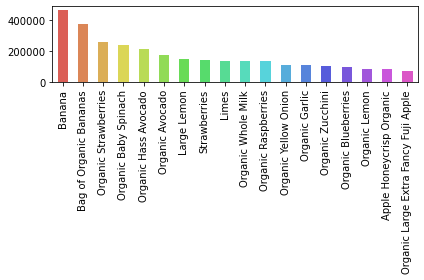

In [80]:
# Item Popularity BAr Chart 

bar_top_20_selling_items = top_20_selling['product_name'].value_counts().plot.bar(color = sns.color_palette('hls', 20))
plt.tight_layout()

In [81]:
# Export of top 20 selling items in Bar Chart

bar_top_20_selling_items.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_20_selling_items.png'))

In [82]:
# Frequency of purchases verification

sales_per_age_group = top_20_selling.groupby('age_group').agg({'order_number':['mean']})

In [83]:
sales_per_age_group

,order_number
,mean
age_group,
18-20,18.805581
21-30,18.815032
31-40,19.177730
41-50,18.823416
51-60,18.835048
61-70,18.728666
71-80,18.908907
80+,19.787256


In [84]:
# Frequency of Sales by n_dependants

sales_per_n_dependents = top_20_selling.groupby('parental_status').agg({'order_number':['mean']})

In [85]:
sales_per_n_dependents

,order_number
,mean
parental_status,
children,18.850249
no children,19.021478


In [86]:
# Frequency of sales per income

sales_per_income = top_20_selling.groupby('income_range').agg({'order_number':['mean']})

In [87]:
sales_per_income

,order_number
,mean
income_range,
025000-040000,16.777771
040000-080000,19.042038
080000-120000,18.894998
120000-160000,18.936871
160000-210000,19.240726
210000-523000,21.029912
523000+,18.825478


In [88]:
# Frequency of sales per weekday

sales_per_weekday = top_20_selling.groupby('weekday').agg({'order_number':['mean']})

In [89]:
sales_per_weekday

,order_number
,mean
weekday,
Friday,18.294390
Monday,19.072013
Saturday,17.635911
Sunday,18.707901
Thursday,19.917758
Tuesday,19.770592
Wednesday,20.025038


In [90]:
# Sales of Top 20 Items sales are pretty stable  throughout the week with the lowest on Saturday at 17.63 and the highest on Wednesday with 20.02

In [91]:
# Sales based on department_id

In [92]:
Sales_by_department_id = ords_prods_customers_high.groupby('department_id').agg({'prices' : ['min', 'mean', 'max','sum']})

In [93]:
Sales_by_department_id.to_clipboard()

In [94]:
ords_prods_customers_high['prices'].value_counts().sort_index()

1.0        112261
1.1        237775
1.2        249714
1.3        416728
1.4        383904
            ...  
24.8          402
24.9         5637
25.0        13455
14900.0      4328
99999.0       678
Name: prices, Length: 242, dtype: int64

In [95]:
# As identified before in this Exercise the Prices of 14900 and 99999 are outliers. We will use a subset for further analysis

In [96]:
result = []

for value in ords_prods_customers_high['prices']:
    if value >= 14900: 
        result.append('outlier')
    else: 
        result.append('other')

In [97]:
result

['other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',


In [98]:
# Column Outliers

ords_prods_customers_high['price_range'] = result

C:\Users\stefa\AppData\Local\Temp/ipykernel_3268/1815080413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customers_high['price_range'] = result


In [99]:
ords_prods_customers_high['price_range'].value_counts()

other      31924973
outlier        5006
Name: price_range, dtype: int64

# Removal of Outliers

In [100]:
# remove outliers with subset of Data

ords_prods_customers_high_nout = ords_prods_customers_high[ords_prods_customers_high['price_range']=='other']

In [101]:
# removal verification

ords_prods_customers_high_nout['price_range'].value_counts()

other    31924973
Name: price_range, dtype: int64

In [102]:
# for a better visualisation i need to import  the department_id names

df_department = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [103]:
df_department.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [104]:
# Transposing the Data for better visibility

df_department.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [116]:
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_orders_hist.png'))

In [105]:
# Creation of column for department_id names

ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 1, 'department_name'] = 'frozen'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 2, 'department_name'] = 'other'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 3, 'department_name'] = 'bakery'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 4, 'department_name'] = 'produce'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 5, 'department_name'] = 'alcohol'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 6, 'department_name'] = 'international'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 7, 'department_name'] = 'beverages'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 8, 'department_name'] = 'pets'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 9, 'department_name'] = 'dry goods pasta'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 10, 'department_name'] = 'bulk'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 11, 'department_name'] = 'personal care'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 12, 'department_name'] = 'meat seafood'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 13, 'department_name'] = 'pantry'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 14, 'department_name'] = 'breakfast'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 15, 'department_name'] = 'canned goods'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 16, 'department_name'] = 'dairy eggs'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 17, 'department_name'] = 'households'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 18, 'department_name'] = 'babies'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 19, 'department_name'] = 'snacks'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 20, 'department_name'] = 'deli'
ords_prods_customers_high_nout.loc[ords_prods_customers_high_nout['department_id'] == 21, 'department_name'] = 'missing'

C:\Users\stefa\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\stefa\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [106]:
# Column Verification

ords_prods_customers_high_nout['department_name'].value_counts()

produce            9288860
dairy eggs         5287739
snacks             2829767
beverages          2633114
frozen             2180787
pantry             1831123
bakery             1147983
canned goods       1041171
deli               1028707
dry goods pasta     845368
households          720087
meat seafood        692678
breakfast           687659
personal care       436395
babies              417536
international       262920
alcohol             149309
pets                 95470
missing              67034
other                35403
bulk                 34011
Name: department_name, dtype: int64

In [107]:
ords_prods_customers_high_nout.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_time                   int64
days_since_prior_order     float64
First_order                   bool
product_id                 float64
add_to_cart_order          float64
reordered                  float64
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_days                object
Busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending                   float64
spending_flag               object
frequency                  float64
frequency_flag              object
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants        

In [108]:
# Break - Saving progress for next day of work 

In [109]:
ords_prods_customers_high_nout.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_customersV2.pkl'))

In [ ]:
# Continuing to create Visualisations for Stakeholders presentation

In [110]:
df_department.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


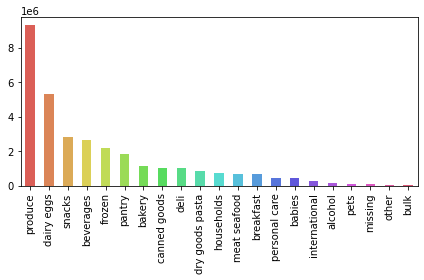

In [112]:
# Visualisation for Top Selling Departments 

bar_top_selling_departments = ords_prods_customers_high_nout['department_name'].value_counts().plot.bar(color = sns.color_palette('hls', 21))
plt.tight_layout()

In [113]:
# Exporting for usage in Presentation

bar_top_selling_departments.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_selling_departments.png'))

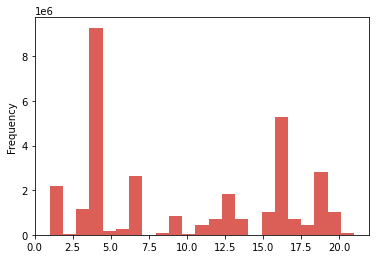

In [114]:
# Frequency of Orders

hist = ords_prods_customers_high_nout['department_id'].plot.hist(bins = 23, color = sns.color_palette('hls',2))

In [115]:
# Export Frequency of Orders

hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','histfrequency.png'))

In [ ]:
# Creating Visualisations for Top 10 sales Percentage as reference

#produce, dayrie eggs, snacks, beverages, frozen, pantry, bakery, canned goods, deli, dry goods pasta

In [117]:
dept_sales = ords_prods_customers_high_nout.groupby('department_name').agg({'prices': ['sum']})

In [119]:
dept_sales.to_clipboard()

In [120]:
dept_sales

,prices
,sum
department_name,
alcohol,1216465.0
babies,3188658.1
bakery,9018109.3
beverages,20227887.0
breakfast,5521121.0
bulk,283793.0
canned goods,7854482.1
dairy eggs,44074970.8


In [ ]:
# We have roughly 88,33 Percent of Sales in the Top 10 Category of Departments

In [123]:
df_department.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [124]:
# Flagging Top 10 departments by ID
# produce= 4, dayrie eggs = 16 , snacks = 19 , beverages = 7 , frozen = 1, pantry = 13, bakery = 3, canned goods = 15, deli = 20, dry goods pasta = 9
result = []

for value in ords_prods_customers_high_nout['department_id']:
    if value == 4:
        result.append('Top 10 performing')
    elif value == 16:
        result.append('Top 10 performing')
    elif value == 19:
        result.append('Top 10 performing')
    elif value == 7:
        result.append('Top 10 performing')
    elif value == 1:
        result.append('Top 10 performing')
    elif value == 13:
        result.append('Top 10 performing')
    elif value == 3:
        result.append('Top 10 performing')      
    elif value == 15:
        result.append('Top 10 performing')   
    elif value == 20:
        result.append('Top 10 performing')           
    elif value == 9:
        result.append('Top 10 performing')           
    else:
        result.append('Normal performing')

In [125]:
result

['Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Normal performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Normal performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Normal performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Normal performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 performing',
 'Top 10 p

In [128]:
# Column creation

ords_prods_customers_high_nout['department_performing']= result

C:\Users\stefa\AppData\Local\Temp/ipykernel_3268/2658474029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customers_high_nout['department_performing']= result


In [129]:
# Column verification

ords_prods_customers_high_nout['department_performing'].value_counts()

Top 10 performing    28114619
Normal performing     3810354
Name: department_performing, dtype: int64

In [130]:
# Subset for Top 10 Performing Departments

ords_prods_customers_Top10dep = ords_prods_customers_high_nout[ords_prods_customers_high_nout['department_performing']=='Top 10 performing']

In [131]:
# Subset Verification

ords_prods_customers_Top10dep['department_performing'].value_counts()

Top 10 performing    28114619
Name: department_performing, dtype: int64

In [ ]:
# Creating pie Chart for Top 10 Department

Text(108.68, 0.5, '')

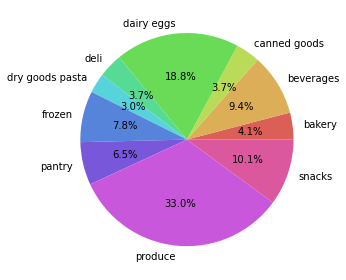

In [136]:
pie_department_name = ords_prods_customers_Top10dep['department_name'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('hls', 10))
plt.tight_layout()
plt.ylabel('')

In [137]:
# Export Visualisation for Presentation

pie_department_name.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Pie_Top10_Department.png'))

In [140]:
#creating Crosstab Visualisations for Age of Customer and consuming habits

department_age = pd.crosstab(ords_prods_customers_Top10dep['department_name'], ords_prods_customers_Top10dep['age_group'], dropna = False)

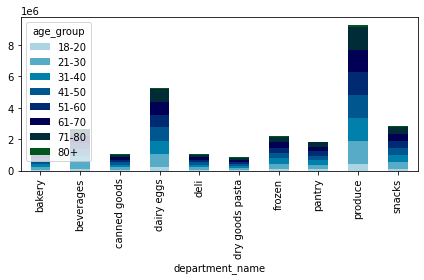

In [144]:
bar_department_age = department_age.plot.bar(stacked = True, color = sns.color_palette('ocean_r', 8))
plt.legend(title = 'age_group', loc='upper left')
plt.tight_layout()

In [146]:
# Export department orders and age
bar_department_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_age.png'))

# Is there a connection between age and family status in terms of ordering habits?

In [147]:
# creating Crosstab Visualisation for Family Status and Ordering habits

family_status = pd.crosstab(ords_prods_customers_high_nout['department_name'], ords_prods_customers_high_nout['fam_status'], dropna = False)

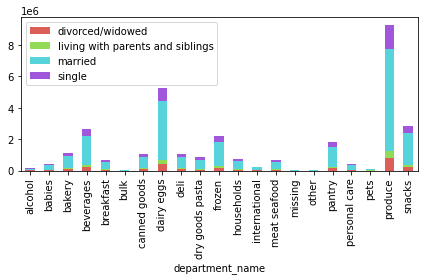

In [148]:
# Visualisation for family Status and department
bar_family_status = family_status.sort_index().plot(kind = 'bar', stacked = True, color = sns.color_palette('hls', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [149]:
# Export Visualisation for Presentation

bar_family_status.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status.png'))

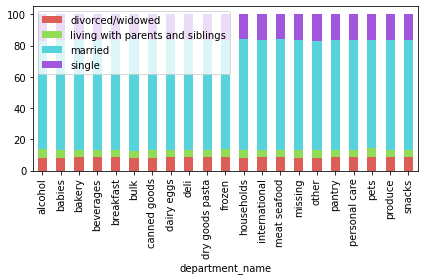

In [150]:
#Creating a stacked bar Chart for visualisation purposes

bar_family_status_stacked = family_status.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('hls', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [ ]:
# we can clearly see the distribution of sales is stable overall departments and no direct impact is made by Family Status

In [151]:
bar_family_status_stacked.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_stacked.png'))

# Top 10 Department Sales by csm income range

In [ ]:
# Creating Crosstab Visualisation for income compared to department

In [154]:
department_income = pd.crosstab(ords_prods_customers_Top10dep['department_name'], ords_prods_customers_Top10dep['income_range'], dropna = False)

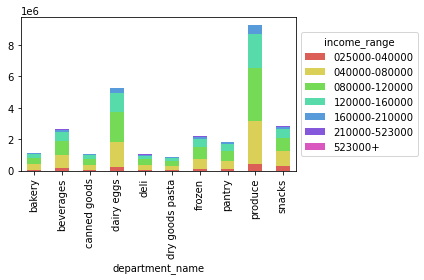

In [155]:
bar_department_income = department_income.plot.bar(stacked = True, color = sns.color_palette('hls', 7))
plt.legend(title = 'income_range',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [ ]:
# In this stacked chart we can see the income compared to the department. Focus on Sales should be up to 160000 income as most sales occur there

In [156]:
bar_department_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_department_income.png'))

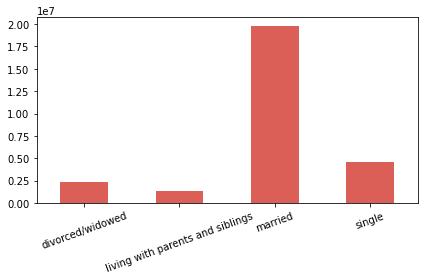

In [157]:
# Creating Crosstab for Total Orders by Family Status 

orders_family_status = ords_prods_customers_Top10dep['fam_status'].value_counts().sort_index().plot.bar(color = sns.color_palette('hls', 1))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [ ]:
# We can see that the Orders mainly are made by customers who are married. Marketing can be shifted towards "Family friendly"

In [158]:
# Export Visualisation for Presentation

orders_family_status.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_family_status.png'))

In [161]:
# creating Crosstab for family Status and dependants compared to Top 10 Departments

department_name_dependants = pd.crosstab(ords_prods_customers_Top10dep['department_name'], ords_prods_customers_Top10dep['n_dependants'], dropna = False)

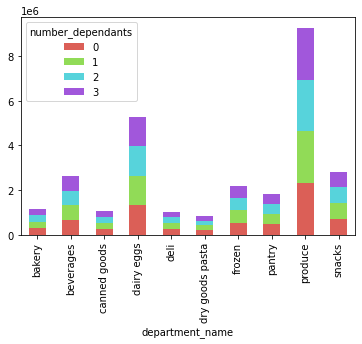

In [162]:
bar_department_name_dependants = department_name_dependants.plot.bar(stacked = True, color = sns.color_palette('hls', 4))
plt.legend(title = 'number_dependants',loc='upper left')

In [165]:
# Export department name and family status by number of dependants

bar_department_name_dependants.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_name_dependants.png'))

In [166]:
# creating Crosstab for spending Flag and income comparison

age_spending = pd.crosstab(ords_prods_customers_high_nout['age_group'], ords_prods_customers_high_nout['spending_flag'], dropna = False)

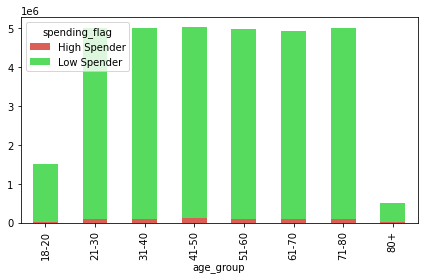

In [167]:
bar_age_spending = age_spending.plot(kind = 'bar', stacked = True, color = sns.color_palette('hls',3))
plt.legend(title = 'spending_flag',loc='upper left')
plt.tight_layout()

In [ ]:
# From this result we can see that the Majority of Orders are made by Customers labeled as Low Spender- High Spending profiles are stable from age 21-80 

In [168]:
# Export Visualisation for Presentation 

bar_age_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_spending.png'))

# Are there differences in ordering habits based on a customer’s region?

In [169]:
# Creating Crosstab for Visualisation

department_region = pd.crosstab(ords_prods_customers_high_nout['department_name'], ords_prods_customers_high_nout['region'], dropna = False)

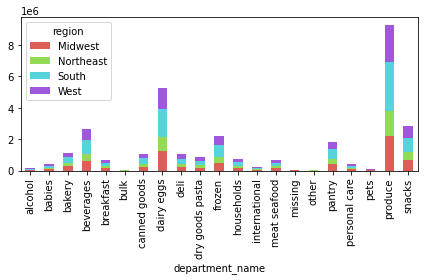

In [170]:
bar_department_region = department_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('hls', 4))
plt.tight_layout()

In [171]:
# Exporting for Visualisation in presentation

bar_department_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_region.png'))

In [172]:
# Creating Crosstab for age and Region comparison

age_region = pd.crosstab(ords_prods_customers_high_nout['age_group'], ords_prods_customers_high_nout['region'], dropna = False)

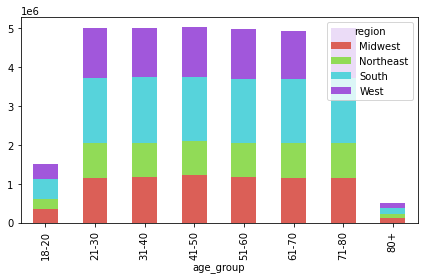

In [173]:
bar_age_region = age_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('hls', 4))
plt.tight_layout()

In [ ]:
# Here we can see that Sales in the different Regions stay more or less the same which confirms our findings and Charts we have created before 

In [174]:
# Exporting for Visualisation

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region.png'))

# Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

Text(0, 0.5, '')

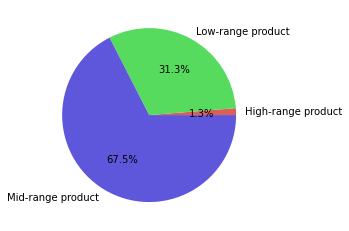

In [175]:
pie_time_product_price = ords_prods_customers_high_nout['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('hls', 3))
plt.ylabel('')

In [176]:
pie_time_product_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_time_price_range.png'))

In [177]:
# Crosstab for Creeation of Top 10 Selling price range Chart by department

departments_price_range = pd.crosstab(ords_prods_customers_Top10dep['department_name'], ords_prods_customers_Top10dep['price_range_loc'], dropna = False)

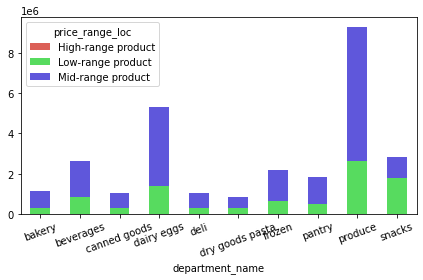

In [179]:
bar_departments_price_range = departments_price_range.plot(kind = 'bar', stacked = True, color = sns.color_palette('hls', 3))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [180]:
# Export Visualisation for Presentation
bar_departments_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_departments_price_range.png'))

# What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

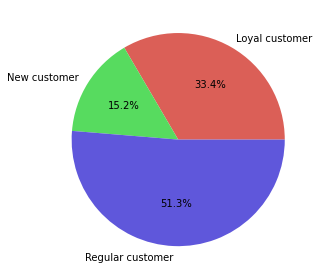

In [181]:
# Creating Pie Chart to display Loyal and returning cutomers
loyalty_pie = ords_prods_customers_high_nout['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('hls',3))
plt.ylabel('')
plt.tight_layout()

In [ ]:
# In this Chart we can see that 51 % Percent are Regular customers and only 33 % percent are considered Loyal . This could be interesting for marketing ín order to shift Regular Customers towards Loyal 

In [182]:
# Exporting for Visualisation in Presentation

loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_pie.png'))

# Are there differences in ordering habits based on a customer’s loyalty status?

In [183]:
# Creating Crosstab for Visualisation of Loyalty Status compared to Ordering habits

frequency_loyalty_status = pd.crosstab(ords_prods_customers_high_nout['frequency_flag'], ords_prods_customers_high_nout['loyalty_flag'], dropna = False)

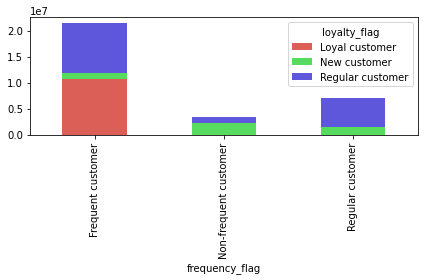

In [184]:
# Bar Chart for display of Loyality Status compared with freqency

bar_frequency_loyalty_status = frequency_loyalty_status.plot(kind = 'bar', stacked = True, color = sns.color_palette('hls',3))
plt.tight_layout()

In [185]:
# Exporting for Visualisation in Presentation

bar_frequency_loyalty_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_loyalty_status.png'))

In [186]:
ords_prods_customers_Top10dep.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,First_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,activity_flag,age_group,income_range,parental_status,weekday,part_of_day,Top Selling,price_range,department_name,department performing,department_performing
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,31-40,040000-080000,children,Monday,Morning,Currently not assigned,other,beverages,Top 10 performing,Top 10 performing
1,2539329,1,1,2,8,NaN,True,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,31-40,040000-080000,children,Monday,Morning,Currently not assigned,other,dairy eggs,Top 10 performing,Top 10 performing
2,2539329,1,1,2,8,NaN,True,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,31-40,040000-080000,children,Monday,Morning,Currently not assigned,other,snacks,Top 10 performing,Top 10 performing
3,2539329,1,1,2,8,NaN,True,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,31-40,040000-080000,children,Monday,Morning,Currently not assigned,other,snacks,Top 10 performing,Top 10 performing
5,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Slowest days,Most_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,31-40,040000-080000,children,Tuesday,Morning,Currently not assigned,other,beverages,Top 10 performing,Top 10 performing


In [187]:
# Exporting lates Dataframe

ords_prods_customers_Top10dep.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_V5.pkl'))

In [188]:
ords_prods_customers_Top10dep.describe()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,spending,frequency,age,n_dependants,income
count,2.811462e+07,2.811462e+07,2.811462e+07,2.811462e+07,2.811462e+07,2.648317e+07,2.811462e+07,2.811462e+07,2.811462e+07,2.811462e+07,2.811462e+07,2.811462e+07,2.811462e+07,2.811462e+07,2.811462e+07,2.811462e+07,2.811462e+07,2.811462e+07
mean,1.710506e+06,1.029462e+05,1.753412e+01,2.734881e+00,1.341895e+01,1.094743e+01,2.572676e+04,8.291692e+00,6.111988e-01,7.036024e+01,9.503454e+00,7.582170e+00,3.484817e+01,1.157848e+01,1.017126e+01,4.947356e+01,1.501474e+00,9.934598e+04
std,9.873754e+05,5.947292e+04,1.762140e+01,2.090971e+00,4.246584e+00,8.668297e+00,1.399800e+04,7.065344e+00,4.874780e-01,3.848137e+01,6.395220e+00,4.002030e+00,2.507916e+01,7.579289e+01,6.894191e+00,1.848588e+01,1.118993e+00,4.275489e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.100000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.555305e+05,5.141600e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.385200e+04,3.000000e+00,0.000000e+00,2.600000e+01,4.000000e+00,4.100000e+00,1.500000e+01,7.386932e+00,6.000000e+00,3.300000e+01,0.000000e+00,6.700600e+04
50%,1.710655e+06,1.026010e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.533000e+04,6.000000e+00,1.000000e+00,8.300000e+01,7.000000e+00,7.300000e+00,2.800000e+01,7.821429e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.660100e+04
75%,2.565411e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.800300e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.100000e+01,4.900000e+01,8.246301e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.277990e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968600e+04,1.450000e+02,1.000000e+00,1.310000e+02,2.000000e+01,2.000000e+01,1.000000e+02,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [189]:
ords_prods_customers_high_nout.describe()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,spending,frequency,age,n_dependants,income
count,3.192497e+07,3.192497e+07,3.192497e+07,3.192497e+07,3.192497e+07,3.007485e+07,3.174275e+07,3.174275e+07,3.174275e+07,3.171312e+07,3.171312e+07,3.171312e+07,3.192497e+07,3.192497e+07,3.192497e+07,3.192497e+07,3.192497e+07,3.192497e+07
mean,1.710488e+06,1.029498e+05,1.747438e+01,2.740341e+00,1.341950e+01,1.100337e+01,2.557668e+04,8.356303e+00,5.980320e-01,7.118650e+01,9.919846e+00,7.790918e+00,3.460950e+01,1.185508e+01,1.022089e+01,4.946709e+01,1.501825e+00,9.951273e+04
std,9.873724e+05,5.946748e+04,1.757694e+01,2.089925e+00,4.247659e+00,8.711317e+00,1.409618e+04,7.130994e+00,4.902956e-01,3.821646e+01,6.281966e+00,4.241245e+00,2.502191e+01,7.985322e+01,6.931372e+00,1.848689e+01,1.118835e+00,4.303680e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.555140e+05,5.143800e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.352500e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.500000e+01,7.389421e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.711900e+04
50%,1.710643e+06,1.026290e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.824895e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.666900e+04
75%,2.565411e+06,1.544090e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.900000e+01,8.252107e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279510e+05
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,1.000000e+02,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [191]:
ords_prods_customers_high_nout.shape

(31924973, 44)

In [192]:
ords_prods_customers.shape

(32641268, 34)

In [194]:
ords_prods_customers_Top10dep.type()

AttributeError: 'DataFrame' object has no attribute 'type'